# Clustering
- Fabian Oppermann
- Philipp Hasel
- Petruta-Denisa Biholari

> Der Datensatz bezieht sich auf Kunden eines Großhändlers. Er umfasst die jährlichen Ausgaben in Geldeinheiten (m.u.) für verschiedene Produktkategorien.

URL: https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set
Anzahl der Instanzen: 440

---
## Datensatzbeschreibung
- **Channel**: Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal))
- **Region**: Lisnon, Oporto or Other (Nominal)
- **Fresh**: annual spending on fresh products (Continuous)
- **Milk**: annual spending on milk products (Continuous)
- **Grocery**: annual spendingon grocery products (Continuous)
- **Frozen**: annual spendingon frozen products (Continuous)
- **Detergents_Paper**: annual spending on detergents and paper products (Continuous)
- **Delicassen**: annual spendingon and delicatessen products (Continuous)

---

# 1. Datenvorschau

In [2]:
import pandas as pd

# Laden der Daten
data = pd.read_csv('./Wholesale customers data.csv')
print("="*100)
print("Datenvorschau:")
print("="*100)
print(data.head())
print("-"*100)
print("\n Statistische Übersicht:")
print(data.describe())
print("-"*100)
print("\n Fehlende Werte:")
print(data.isnull().sum())

Datenvorschau:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
----------------------------------------------------------------------------------------------------

 Statistische Übersicht:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25% 

### Beobachtung der Daten
Wir können erkennen, dass keine Daten fehlen oder NULL sind. Die Datenvorbereitung ist somit nicht notwendig oder nur minimal.
Weiteres können wir sehen, dass es **440 Einträge** mit **8 Attributen** gibt. Zwei der Attribute sind **nominal** (Channel und Region), die restlichen sind **kontinuierlich**.

---

# 2. Pairplott inkl. Diskussion

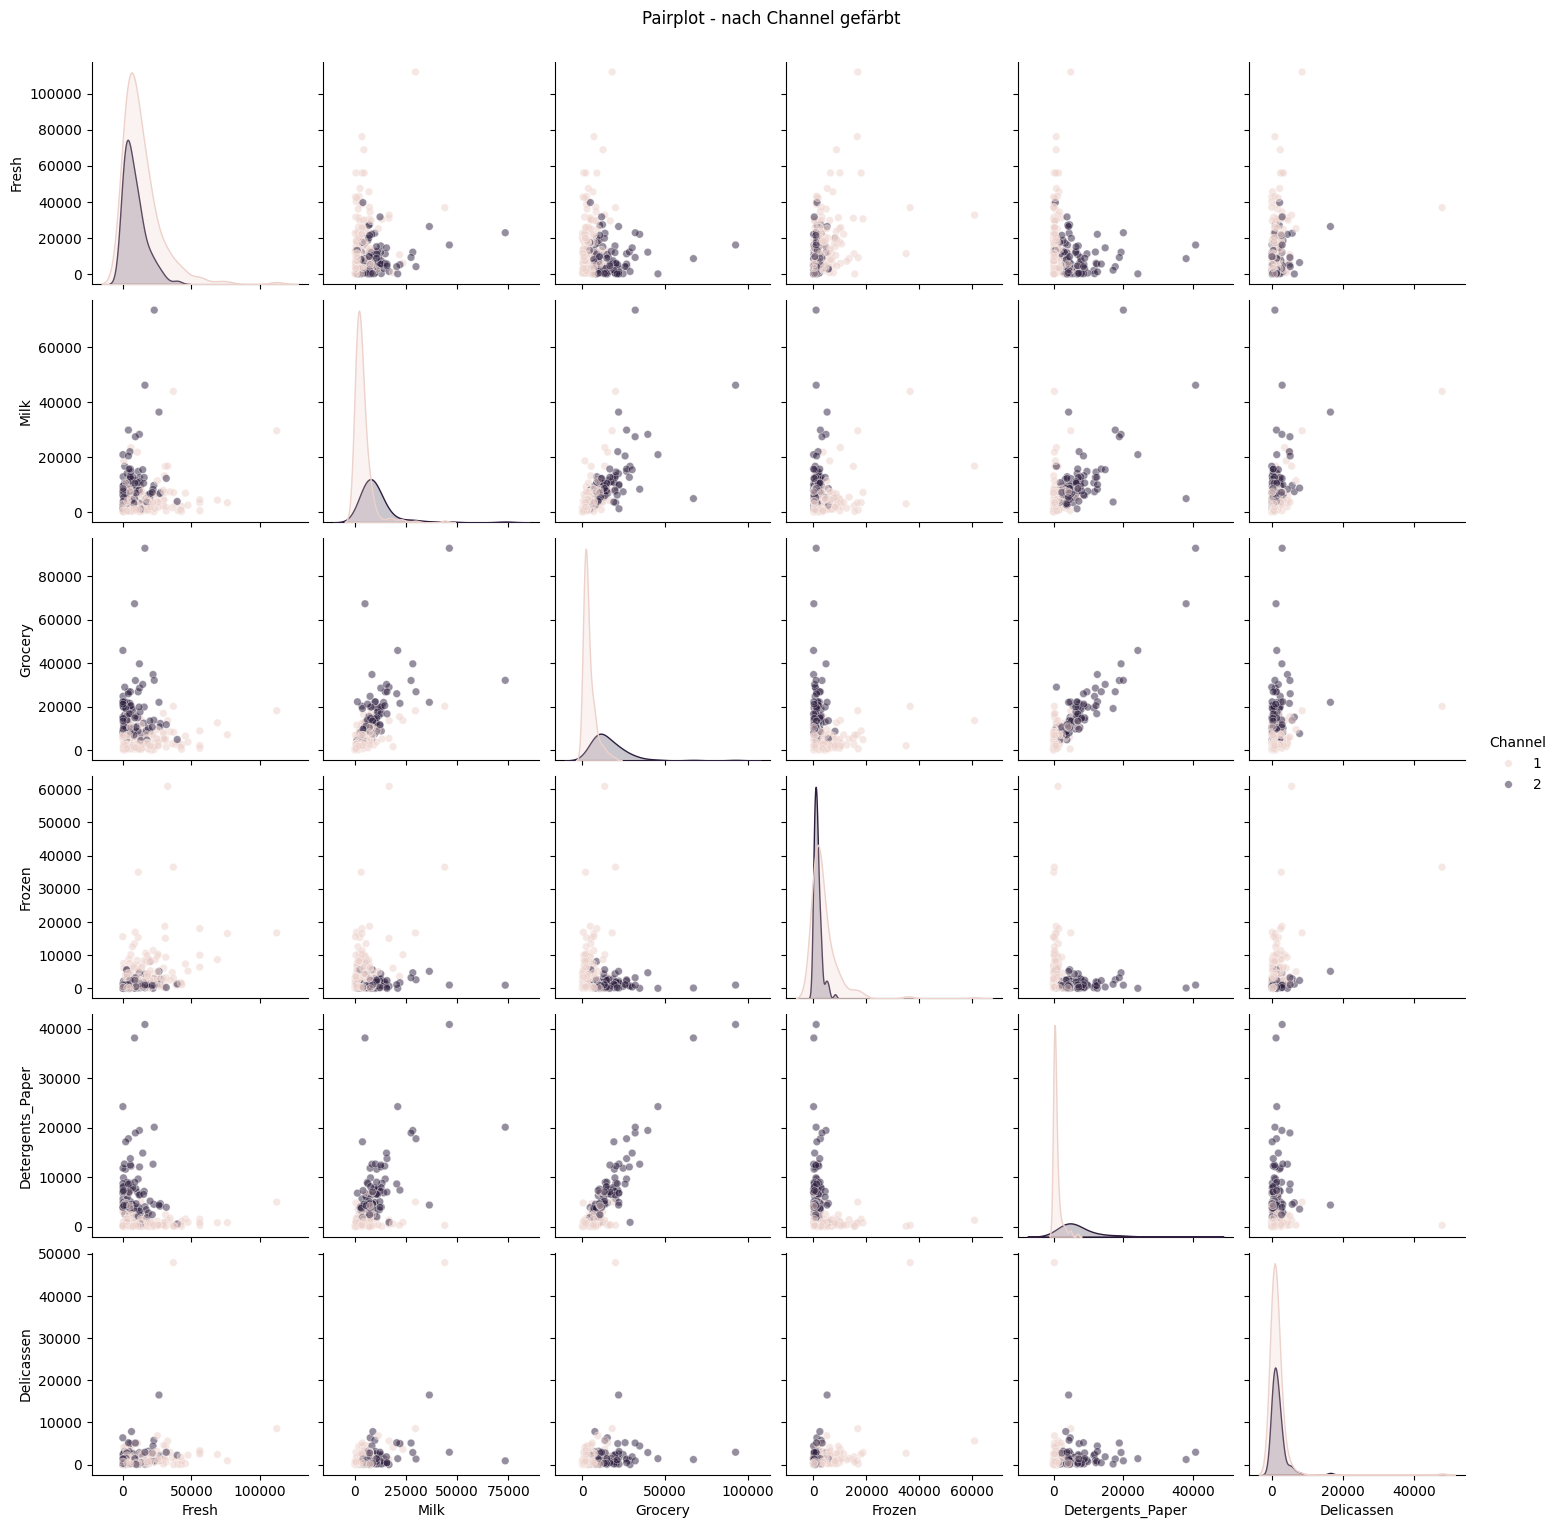

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

const_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

sampled = data.sample(min(300, len(data)), random_state=42)
sns.pairplot(sampled, vars=const_cols, hue="Channel", diag_kind="kde", plot_kws={"alpha":0.5, "s":30})
plt.suptitle("Pairplot - nach Channel gefärbt", y=1.02)
plt.show()

### Beobachtung aus Pairplot
- Die Daten sind rechtsschief verteilt.
    - Wenig große Kunden kaufen sehr viel, die meisten wenig.
- Channel 2 hat tendenziell höhere Werte bei "Milk", "Grocery" und "Detergants_Paper"
- Channel 1 hat höhere Werte bei "Fresh" und "Frozen"

=> **Typisch** für Einzelhandel-Kunden



- Zwischen "Grocery", "Milk" und "Detergents_Paper" gibt es eine starke Korrelation
    - Kunden, die viel in einem dieser Bereiche ausgeben, geben auch in den anderen beiden Bereichen viel aus.
- Zwischen "Fresh" und den anderen Variablen besteht wenig Korrelation
    - Kunden, die viel in "Fresh" ausgeben, haben nicht zwangsläufig hohe Ausgaben in den anderen Bereichen.

=> **Typisch** für Gastronomie-Kunden

---

Der Pairplot zeigt klar zwei unterschiedliche Einkaufsverhalten:

- Channel 1 => frische Produkte, geringere Gesamtumsätze.
- Channel 2 => verarbeitete Produkte, starke Korrelationen zwischen Kategorien.

---

Wir werden uns auf `Fresh, Milk, Grocery, Detergents_Paper` konzentrieren.

# 3. Datenvorbereitung

Die Daten sind sehr rechtsschief verteilt. Wir wenden eine Log-Transformation, Standardisierung und Skalierung an, um die Verteilung zu normalisieren.

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler 

cols_for_clustering = ['Fresh', 'Frozen', 'Grocery', 'Delicassen']
df_cluster = data[cols_for_clustering].copy()

df_log = np.log1p(df_cluster)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

df_prepared = pd.DataFrame(df_scaled, columns=cols_for_clustering)
print("="*100)
print("Datenvorschau nach Vorbereitung:")
print(df_prepared.head())
print("-"*100)
print("\n Statistische Übersicht nach Vorbereitung:")
print(df_prepared.describe())

Datenvorschau nach Vorbereitung:
      Fresh    Frozen   Grocery  Delicassen
0  0.486184 -1.509250  0.440155    0.408966
1  0.087889  0.134052  0.652171    0.627926
2  0.016356  0.376899  0.454687    1.776833
3  0.517477  1.141574 -0.084792    0.633133
4  0.880631  0.757322  0.395847    1.456588
----------------------------------------------------------------------------------------------------

 Statistische Übersicht nach Vorbereitung:
              Fresh        Frozen       Grocery    Delicassen
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02
mean   3.229740e-17  2.987509e-16 -1.081963e-15 -2.220446e-17
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00
min   -5.001217e+00 -3.159118e+00 -6.355190e+00 -4.088856e+00
25%   -4.659360e-01 -5.405240e-01 -6.909415e-01 -5.081462e-01
50%    2.148413e-01  2.180154e-02  2.257341e-02  1.567407e-01
75%    6.836939e-01  6.818408e-01  7.491423e-01  6.469559e-01
max    1.970662e+00  2.900093e+00  2.698281e+00  3.177354e+00


# 4. Clustering-Methoden

Die vier verschiedenen Clustering-Algorithmen werden implementiert und verglichen:
1. **K-Means**  mit WSS-Grafik zur Bestimmung der optimalen Cluster-Anzahl
2. **EM-Clustering** mit BIC-Bestimmung
3. **DBSCAN** mit Parameter-Optimierung
4. **Hierarchisches Clustering** mit Baumdiagramm und Diskussion

## 4.1 K-Means Clustering

K-Means ist ein Clustering-Algorithmus, bei dem jedes Cluster durch seinen Mittelpunkt dargestellt wird.

**Herausforderung:** Die Anzahl der Cluster k muss im Voraus festgelegt werden.

**Lösung:** Verwendung der Elbow-Methode mit WSS (Within-Cluster Sum of Squares). Die WSS misst die Summe der quadrierten Abstände aller Punkte zu ihrem jeweiligen Cluster-Mittelpunkt. Mit steigender Cluster-Anzahl sinkt die WSS. Der Nutzen nimmt ab einem gewissen Punkt ab, dass zeigt sich als "Ellbogen" im Graphen.

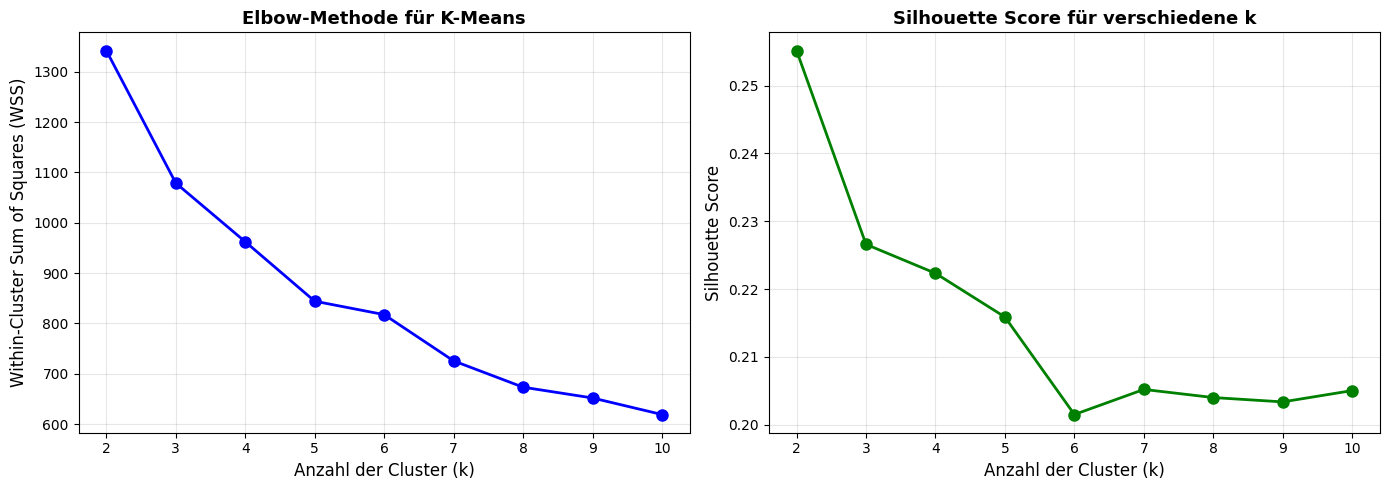

K-Means Analyse - WSS und Silhouette Score:
k=2: WSS=1342.10, Silhouette Score=0.2552
k=3: WSS=1078.87, Silhouette Score=0.2266
k=4: WSS=962.38, Silhouette Score=0.2223
k=5: WSS=844.24, Silhouette Score=0.2159
k=6: WSS=817.61, Silhouette Score=0.2015
k=7: WSS=725.68, Silhouette Score=0.2052
k=8: WSS=673.46, Silhouette Score=0.2040
k=9: WSS=652.02, Silhouette Score=0.2034
k=10: WSS=619.15, Silhouette Score=0.2050

Interpretation:
- Der deutlichste Knick im WSS-Graphen ist bei k=3 zu beobachten
- Der Silhouette Score erreicht bei k=3 ebenfalls einen guten Wert
- Daher wird k=3 als optimale Cluster-Anzahl gewählt


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Berechnung von WSS und Silhouette Score für verschiedene k-Werte
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_prepared)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_prepared, kmeans.labels_))

# Visualisierung der Ergebnisse
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# WSS-Grafik (Elbow-Methode)
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Anzahl der Cluster (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares (WSS)', fontsize=12)
ax1.set_title('Elbow-Methode für K-Means', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Silhouette Score
ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Anzahl der Cluster (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score für verschiedene k', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ausgabe der berechneten Metriken
print("="*100)
print("K-Means Analyse - WSS und Silhouette Score:")
print("="*100)
for k, wss, sil in zip(K_range, inertias, silhouette_scores):
    print(f"k={k}: WSS={wss:.2f}, Silhouette Score={sil:.4f}")

print("\nInterpretation:")
print("- Der deutlichste Knick im WSS-Graphen ist bei k=3 zu beobachten")
print("- Der Silhouette Score erreicht bei k=3 ebenfalls einen guten Wert")
print("- Daher wird k=3 als optimale Cluster-Anzahl gewählt")

In [6]:
# K-Means mit optimaler Cluster-Anzahl durchführen
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(df_prepared)

# Analyse der gefundenen Cluster
print("="*100)
print(f"K-Means Clustering mit k={optimal_k}:")
print("="*100)

original_cols = ['Fresh', 'Frozen', 'Grocery', 'Delicassen']

for cluster_id in range(optimal_k):
    mask = kmeans_labels == cluster_id
    cluster_data = data.loc[mask, original_cols]
    anzahl = mask.sum()
    
    print(f"\nCluster {cluster_id}: {anzahl} Instanzen")
    print("Durchschnittliche Ausgaben pro Kategorie:")
    
    for col in original_cols:
        mittel = cluster_data[col].mean()
        median = cluster_data[col].median()
        print(f"  {col:20s}: {mittel:8.0f} (Median: {median:8.0f})")
    
    # Cluster-Charakterisierung
    total_avg = cluster_data[original_cols].sum(axis=1).mean()
    fresh_ratio = cluster_data['Fresh'].mean() / total_avg if total_avg > 0 else 0
    
    print(f"\nGesamtausgaben durchschnittlich: {total_avg:.0f}")
    
    # Bestimmung der Cluster-Bedeutung
    if total_avg > 30000:
        if fresh_ratio > 0.4:
            print("Cluster-Bedeutung: Großkunden mit Fokus auf frische Produkte")
            print("Interpretation: Vermutlich Restaurants, Hotels oder Catering-Unternehmen")
        else:
            print("Cluster-Bedeutung: Großkunden mit ausgewogenem Sortiment")
            print("Interpretation: Vermutlich große Supermärkte oder Lebensmittelhändler")
    elif total_avg > 15000:
        print("Cluster-Bedeutung: Mittelgroße Kunden")
        print("Interpretation: Mittlere Geschäfte mit durchschnittlichen Bestellmengen")
    else:
        print("Cluster-Bedeutung: Kleine Kunden")
        print("Interpretation: Kleine Läden, Cafés oder spezialisierte Geschäfte")

print("\n" + "="*100)

K-Means Clustering mit k=3:

Cluster 0: 89 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :     2247 (Median:     1073)
  Frozen              :      739 (Median:      402)
  Grocery             :    11360 (Median:     9785)
  Delicassen          :      809 (Median:      550)

Gesamtausgaben durchschnittlich: 15156
Cluster-Bedeutung: Mittelgroße Kunden
Interpretation: Mittlere Geschäfte mit durchschnittlichen Bestellmengen

Cluster 1: 185 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :    12851 (Median:     9785)
  Frozen              :     2943 (Median:     2121)
  Grocery             :     2413 (Median:     2067)
  Delicassen          :      757 (Median:      569)

Gesamtausgaben durchschnittlich: 18964
Cluster-Bedeutung: Mittelgroße Kunden
Interpretation: Mittlere Geschäfte mit durchschnittlichen Bestellmengen

Cluster 2: 166 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :    16281 (Median:    12014)
 

## 4.2 EM-Clustering 

Das EM-Clustering (Expectation-Maximization) basiert auf Gauß-Mischmodellen und ist ein verteilungsbasierter Ansatz.

**Unterschied zu K-Means:**
- K-Means: Harte Zuordnung, da jeder Punkt genau einem Cluster gehört.
- EM: Weiche Zuordnung, da jeder Punkt eine Wahrscheinlichkeit für jedes Cluster hat.

**Modellselektion:**
Das BIC (Bayesian Information Criterion) und AIC (Akaike Information Criterion) werden zur Bestimmung der optimalen Anzahl von Komponenten verwendet. Beide Kriterien meiden zu komplexe Modelle und helfen Overfitting zu vermeiden. Je niedriger die Werte, desto besser das Modell.

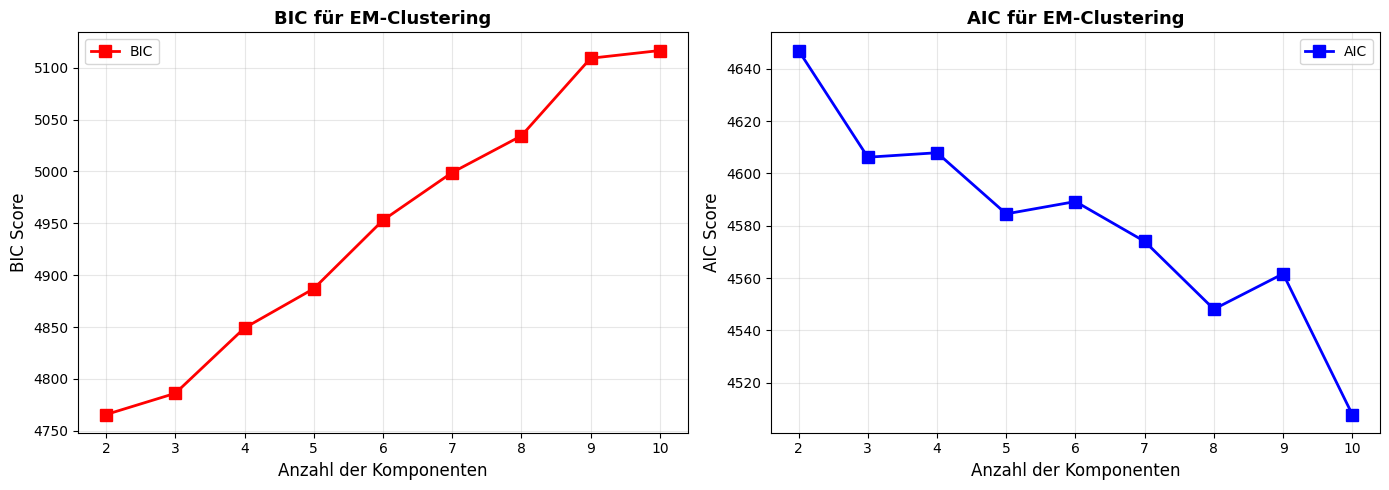

EM-Clustering - BIC und AIC Analyse:
n=2: BIC=4765.57, AIC=4647.06 <- Minimum
n=3: BIC=4786.05, AIC=4606.23
n=4: BIC=4849.06, AIC=4607.94
n=5: BIC=4886.97, AIC=4584.55
n=6: BIC=4952.99, AIC=4589.27
n=7: BIC=4999.03, AIC=4574.00
n=8: BIC=5034.40, AIC=4548.07
n=9: BIC=5109.25, AIC=4561.62
n=10: BIC=5116.68, AIC=4507.75

Optimale Anzahl der Komponenten: n=2 (minimales BIC)
Diese Anzahl wird für das finale EM-Clustering verwendet.


In [7]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Berechnung von BIC und AIC für verschiedene Komponentenanzahlen
bic_scores = []
aic_scores = []
n_range = range(2, 11)

for n in n_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_prepared)
    bic_scores.append(gmm.bic(df_prepared))
    aic_scores.append(gmm.aic(df_prepared))

# Visualisierung der Informationskriterien
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# BIC-Grafik
ax1.plot(n_range, bic_scores, 'rs-', linewidth=2, markersize=8, label='BIC')
ax1.set_xlabel('Anzahl der Komponenten', fontsize=12)
ax1.set_ylabel('BIC Score', fontsize=12)
ax1.set_title('BIC für EM-Clustering', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# AIC-Grafik
ax2.plot(n_range, aic_scores, 'bs-', linewidth=2, markersize=8, label='AIC')
ax2.set_xlabel('Anzahl der Komponenten', fontsize=12)
ax2.set_ylabel('AIC Score', fontsize=12)
ax2.set_title('AIC für EM-Clustering', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Ausgabe der Ergebnisse
print("="*100)
print("EM-Clustering - BIC und AIC Analyse:")
print("="*100)
for n, bic, aic in zip(n_range, bic_scores, aic_scores):
    marker = " <- Minimum" if bic == min(bic_scores) else ""
    print(f"n={n}: BIC={bic:.2f}, AIC={aic:.2f}{marker}")

best_n = n_range[bic_scores.index(min(bic_scores))]
print(f"\nOptimale Anzahl der Komponenten: n={best_n} (minimales BIC)")
print(f"Diese Anzahl wird für das finale EM-Clustering verwendet.")

In [8]:
# EM-Clustering mit optimaler Komponentenanzahl
optimal_n = 3
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
em_labels = gmm.fit_predict(df_prepared)

# Definition der zu analysierenden Spalten
original_cols = ['Fresh', 'Frozen', 'Grocery', 'Delicassen']

print("="*100)
print(f"EM-Clustering mit n={optimal_n} Komponenten:")
print("="*100)

for component_id in range(optimal_n):
    mask = em_labels == component_id
    cluster_data = data.loc[mask, original_cols]
    anzahl = mask.sum()
    
    print(f"\nKomponente {component_id}: {anzahl} Instanzen")
    print("Durchschnittliche Ausgaben pro Kategorie:")
    
    for col in original_cols:
        mittel = cluster_data[col].mean()
        median = cluster_data[col].median()
        print(f"  {col:20s}: {mittel:8.0f} (Median: {median:8.0f})")
    
    # Charakterisierung der Komponente
    total_avg = cluster_data[original_cols].sum(axis=1).mean()
    fresh_ratio = cluster_data['Fresh'].mean() / total_avg if total_avg > 0 else 0
    
    print(f"\nGesamtausgaben durchschnittlich: {total_avg:.0f}")
    
    # Bestimmung der Komponenten-Bedeutung
    if total_avg > 30000:
        if fresh_ratio > 0.4:
            print("Komponenten-Bedeutung: Großkunden mit Fokus auf frische Produkte")
            print("Interpretation: Vermutlich Restaurants, Hotels oder Catering-Unternehmen")
        else:
            print("Komponenten-Bedeutung: Großkunden mit ausgewogenem Sortiment")
            print("Interpretation: Vermutlich große Supermärkte oder Lebensmittelhändler")
    elif total_avg > 15000:
        print("Komponenten-Bedeutung: Mittelgroße Kunden")
        print("Interpretation: Mittlere Geschäfte mit durchschnittlichen Bestellmengen")
    else:
        print("Komponenten-Bedeutung: Kleine Kunden")
        print("Interpretation: Kleine Läden, Cafés oder spezialisierte Geschäfte")

print("\n" + "="*100)
print("\nBeobachtung: EM und K-Means liefern ähnliche Ergebnisse.")
print("Dies deutet darauf hin, dass die Daten gut durch Cluster beschrieben werden können und beide Methoden die gleichen Muster erkennen.")

EM-Clustering mit n=3 Komponenten:

Komponente 0: 71 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :     6252 (Median:     1406)
  Frozen              :     1124 (Median:      349)
  Grocery             :    11769 (Median:    10391)
  Delicassen          :      715 (Median:      225)

Gesamtausgaben durchschnittlich: 19860
Komponenten-Bedeutung: Mittelgroße Kunden
Interpretation: Mittlere Geschäfte mit durchschnittlichen Bestellmengen

Komponente 1: 160 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :    15243 (Median:    13448)
  Frozen              :     2227 (Median:     1396)
  Grocery             :     6118 (Median:     2774)
  Delicassen          :      843 (Median:      590)

Gesamtausgaben durchschnittlich: 24431
Komponenten-Bedeutung: Mittelgroße Kunden
Interpretation: Mittlere Geschäfte mit durchschnittlichen Bestellmengen

Komponente 2: 209 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :    11

## 4.3 DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) ist ein dichtebasierter Clustering-Algorithmus.

**Vorteile:**
- Keine Vorgabe der Cluster-Anzahl notwendig
- Automatische Erkennung von Ausreißern
- Erkennung von Clustern 

**Parameter:**
- Epsilon (ε): Maximale Distanz zwischen zwei Punkten, um als Nachbarn zu gelten
- minPts: Minimale Anzahl von Punkten, um einen dichten Bereich zu bilden

**Methodik zur Parameter-Bestimmung:**
Der K-distance Graph wird verwendet, um einen geeigneten Wert für Epsilon zu finden. Anschließend werden verschiedene Kombinationen von ε und minPts getestet und anhand der resultierenden Cluster-Anzahl und Rausch-Punkte bewertet.

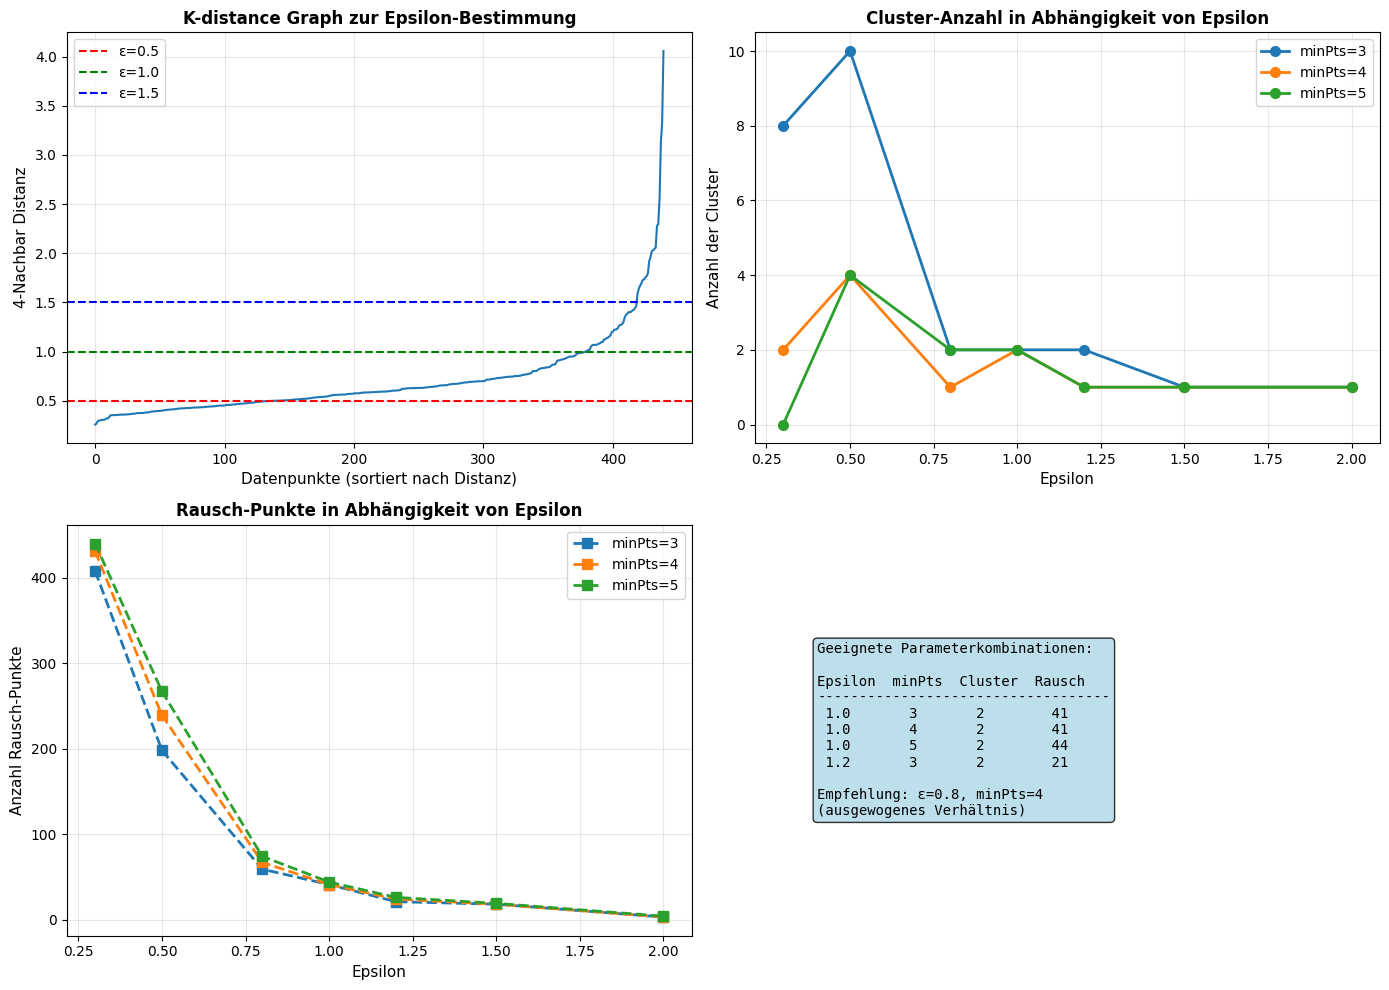

DBSCAN Parameter-Analyse:

Getestete Kombinationen (sortiert nach Cluster-Anzahl):
ε= 0.3, minPts=5: 0 Cluster, 440 Rausch-Punkte
ε= 2.0, minPts=3: 1 Cluster,   3 Rausch-Punkte
ε= 2.0, minPts=4: 1 Cluster,   3 Rausch-Punkte
ε= 2.0, minPts=5: 1 Cluster,   4 Rausch-Punkte
ε= 1.5, minPts=3: 1 Cluster,  18 Rausch-Punkte
ε= 1.5, minPts=4: 1 Cluster,  18 Rausch-Punkte
ε= 1.5, minPts=5: 1 Cluster,  19 Rausch-Punkte
ε= 1.2, minPts=4: 1 Cluster,  24 Rausch-Punkte
ε= 1.2, minPts=5: 1 Cluster,  26 Rausch-Punkte
ε= 0.8, minPts=4: 1 Cluster,  67 Rausch-Punkte
ε= 1.2, minPts=3: 2 Cluster,  21 Rausch-Punkte
ε= 1.0, minPts=3: 2 Cluster,  41 Rausch-Punkte


In [9]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# K-distance Graph zur Bestimmung von Epsilon
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_prepared)
distances, indices = neighbors_fit.kneighbors(df_prepared)
distances = np.sort(distances[:, -1], axis=0)

# Analytische Grafiken für DBSCAN-Parameter
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# K-distance Graph
ax = axes[0, 0]
ax.plot(distances, linewidth=1.5)
ax.set_ylabel('4-Nachbar Distanz', fontsize=11)
ax.set_xlabel('Datenpunkte (sortiert nach Distanz)', fontsize=11)
ax.set_title('K-distance Graph zur Epsilon-Bestimmung', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0.5, color='r', linestyle='--', label='ε=0.5')
ax.axhline(y=1.0, color='g', linestyle='--', label='ε=1.0')
ax.axhline(y=1.5, color='b', linestyle='--', label='ε=1.5')
ax.legend()

# Systematische Parametersuche
epsilon_werte = [0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 2.0]
minpts_werte = [3, 4, 5]
ergebnisse = []

for eps in epsilon_werte:
    for min_pts in minpts_werte:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        labels = dbscan.fit_predict(df_prepared)
        n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
        n_rausch = list(labels).count(-1)
        ergebnisse.append({
            'eps': eps,
            'min_pts': min_pts,
            'cluster': n_cluster,
            'rausch': n_rausch,
            'labels': labels
        })

# Cluster-Anzahl vs. Epsilon
ax = axes[0, 1]
eps_unique = sorted(set([r['eps'] for r in ergebnisse]))

for min_pts in minpts_werte:
    cluster_zahlen = []
    for eps in eps_unique:
        r = [x for x in ergebnisse if x['eps'] == eps and x['min_pts'] == min_pts][0]
        cluster_zahlen.append(r['cluster'])
    ax.plot(eps_unique, cluster_zahlen, 'o-', label=f'minPts={min_pts}', linewidth=2, markersize=7)

ax.set_xlabel('Epsilon', fontsize=11)
ax.set_ylabel('Anzahl der Cluster', fontsize=11)
ax.set_title('Cluster-Anzahl in Abhängigkeit von Epsilon', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

# Rausch-Punkte vs. Epsilon
ax = axes[1, 0]

for min_pts in minpts_werte:
    rausch_zahlen = []
    for eps in eps_unique:
        r = [x for x in ergebnisse if x['eps'] == eps and x['min_pts'] == min_pts][0]
        rausch_zahlen.append(r['rausch'])
    ax.plot(eps_unique, rausch_zahlen, 's--', label=f'minPts={min_pts}', linewidth=2, markersize=7)

ax.set_xlabel('Epsilon', fontsize=11)
ax.set_ylabel('Anzahl Rausch-Punkte', fontsize=11)
ax.set_title('Rausch-Punkte in Abhängigkeit von Epsilon', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

# Empfohlene Parameterkombinationen
ax = axes[1, 1]
ax.axis('off')

gute_kombi = [(r['eps'], r['min_pts'], r['cluster'], r['rausch']) 
              for r in ergebnisse 
              if 2 <= r['cluster'] <= 6 and r['rausch'] < 50]

text = "Geeignete Parameterkombinationen:\n\n"
text += "Epsilon  minPts  Cluster  Rausch\n"
text += "-" * 35 + "\n"
for eps, mp, cl, rausch in sorted(gute_kombi)[:8]:
    text += f" {eps:.1f}       {mp}       {cl}        {rausch}\n"

text += "\nEmpfehlung: ε=0.8, minPts=4\n"
text += "(ausgewogenes Verhältnis)"

ax.text(0.1, 0.5, text, fontsize=10, verticalalignment='center', 
        family='monospace', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("="*100)
print("DBSCAN Parameter-Analyse:")
print("="*100)
print("\nGetestete Kombinationen (sortiert nach Cluster-Anzahl):")
for r in sorted(ergebnisse, key=lambda x: (x['cluster'], -x['eps']))[:12]:
    print(f"ε={r['eps']:4.1f}, minPts={r['min_pts']}: "
          f"{r['cluster']} Cluster, {r['rausch']:3d} Rausch-Punkte")

In [10]:
# DBSCAN mit optimalen Parametern
best_eps = 0.8
best_minpts = 4

dbscan = DBSCAN(eps=best_eps, min_samples=best_minpts)
dbscan_labels = dbscan.fit_predict(df_prepared)

n_cluster = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_rausch = list(dbscan_labels).count(-1)

# Definition der zu analysierenden Spalten
original_cols = ['Fresh', 'Frozen', 'Grocery', 'Delicassen']

print("="*100)
print(f"DBSCAN mit ε={best_eps}, minPts={best_minpts}:")
print("="*100)
print(f"\nAnzahl gefundener Cluster: {n_cluster}")
print(f"Anzahl Rausch-Punkte (Outliers): {n_rausch}")

# Analyse der gefundenen Cluster
for cluster_id in sorted(set(dbscan_labels)):
    if cluster_id == -1:
        continue
    
    mask = dbscan_labels == cluster_id
    cluster_data = data.loc[mask, original_cols]
    anzahl = mask.sum()
    
    print(f"\nCluster {cluster_id}: {anzahl} Instanzen")
    print("Durchschnittliche Ausgaben pro Kategorie:")
    
    for col in original_cols:
        mittel = cluster_data[col].mean()
        print(f"  {col:20s}: {mittel:8.0f}")
    
    total_avg = cluster_data[original_cols].sum(axis=1).mean()
    print(f"Gesamtausgaben durchschnittlich: {total_avg:.0f}")

# Analyse der Rausch-Punkte
if n_rausch > 0:
    mask = dbscan_labels == -1
    rausch_data = data.loc[mask, original_cols]
    
    print(f"\nRausch-Punkte (Outliers): {n_rausch} Instanzen")
    print("Durchschnittliche Ausgaben pro Kategorie:")
    
    for col in original_cols:
        mittel = rausch_data[col].mean()
        print(f"  {col:20s}: {mittel:8.0f}")
    
    print("\nBedeutung: Atypische Kunden mit ungewöhnlichen Ausgabenmustern")
    print("Interpretation: Diese Punkte passen in kein dichtes Cluster und könnten")
    print("entweder Datenfehler oder tatsächlich spezielle Nischenkunden darstellen.")

print("\n" + "="*100)
print("\nVorteil von DBSCAN: Ausreißer werden automatisch identifiziert und nicht in Cluster gezwungen, wie es bei K-Means oder EM der Fall wäre.")

DBSCAN mit ε=0.8, minPts=4:

Anzahl gefundener Cluster: 1
Anzahl Rausch-Punkte (Outliers): 67

Cluster 0: 373 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :    12117
  Frozen              :     2903
  Grocery             :     6946
  Delicassen          :     1362
Gesamtausgaben durchschnittlich: 23328

Rausch-Punkte (Outliers): 67 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :    11350
  Frozen              :     4013
  Grocery             :    13547
  Delicassen          :     2430

Bedeutung: Atypische Kunden mit ungewöhnlichen Ausgabenmustern
Interpretation: Diese Punkte passen in kein dichtes Cluster und könnten
entweder Datenfehler oder tatsächlich spezielle Nischenkunden darstellen.


Vorteil von DBSCAN: Ausreißer werden automatisch identifiziert und nicht in Cluster gezwungen, wie es bei K-Means oder EM der Fall wäre.


## 4.4 Hierarchisches Clustering 

Hierarchisches Clustering erstellt ein Baumdiagramm (Dendrogramm), der die schrittweise Zusammenführung von Clustern zeigt.

**Single Linkage-Methode:**
Die Distanz zwischen zwei Clustern wird als die minimale Distanz zwischen beliebigen zwei Punkten aus den jeweiligen Clustern definiert.

**Vorgehen:**
1. Jeder Punkt startet als eigenes Cluster
2. In jedem Schritt werden die zwei nächstgelegenen Cluster zusammengeführt
3. Dies wird wiederholt bis alle Punkte in einem Cluster sind
4. Das Dendrogramm zeigt die Hierarchie und ermöglicht die Wahl eines geeigneten "Schnitts"

**Vorteil:** Die vollständige Hierarchie ist sichtbar und die Cluster-Anzahl kann nachträglich festgelegt werden.

Hierarchisches Clustering - Single Linkage

Erstelle Dendrogramm mit 100er Stichprobe für detaillierte Visualisierung...
Berechne Linkage-Matrix für alle 440 Datenpunkte...


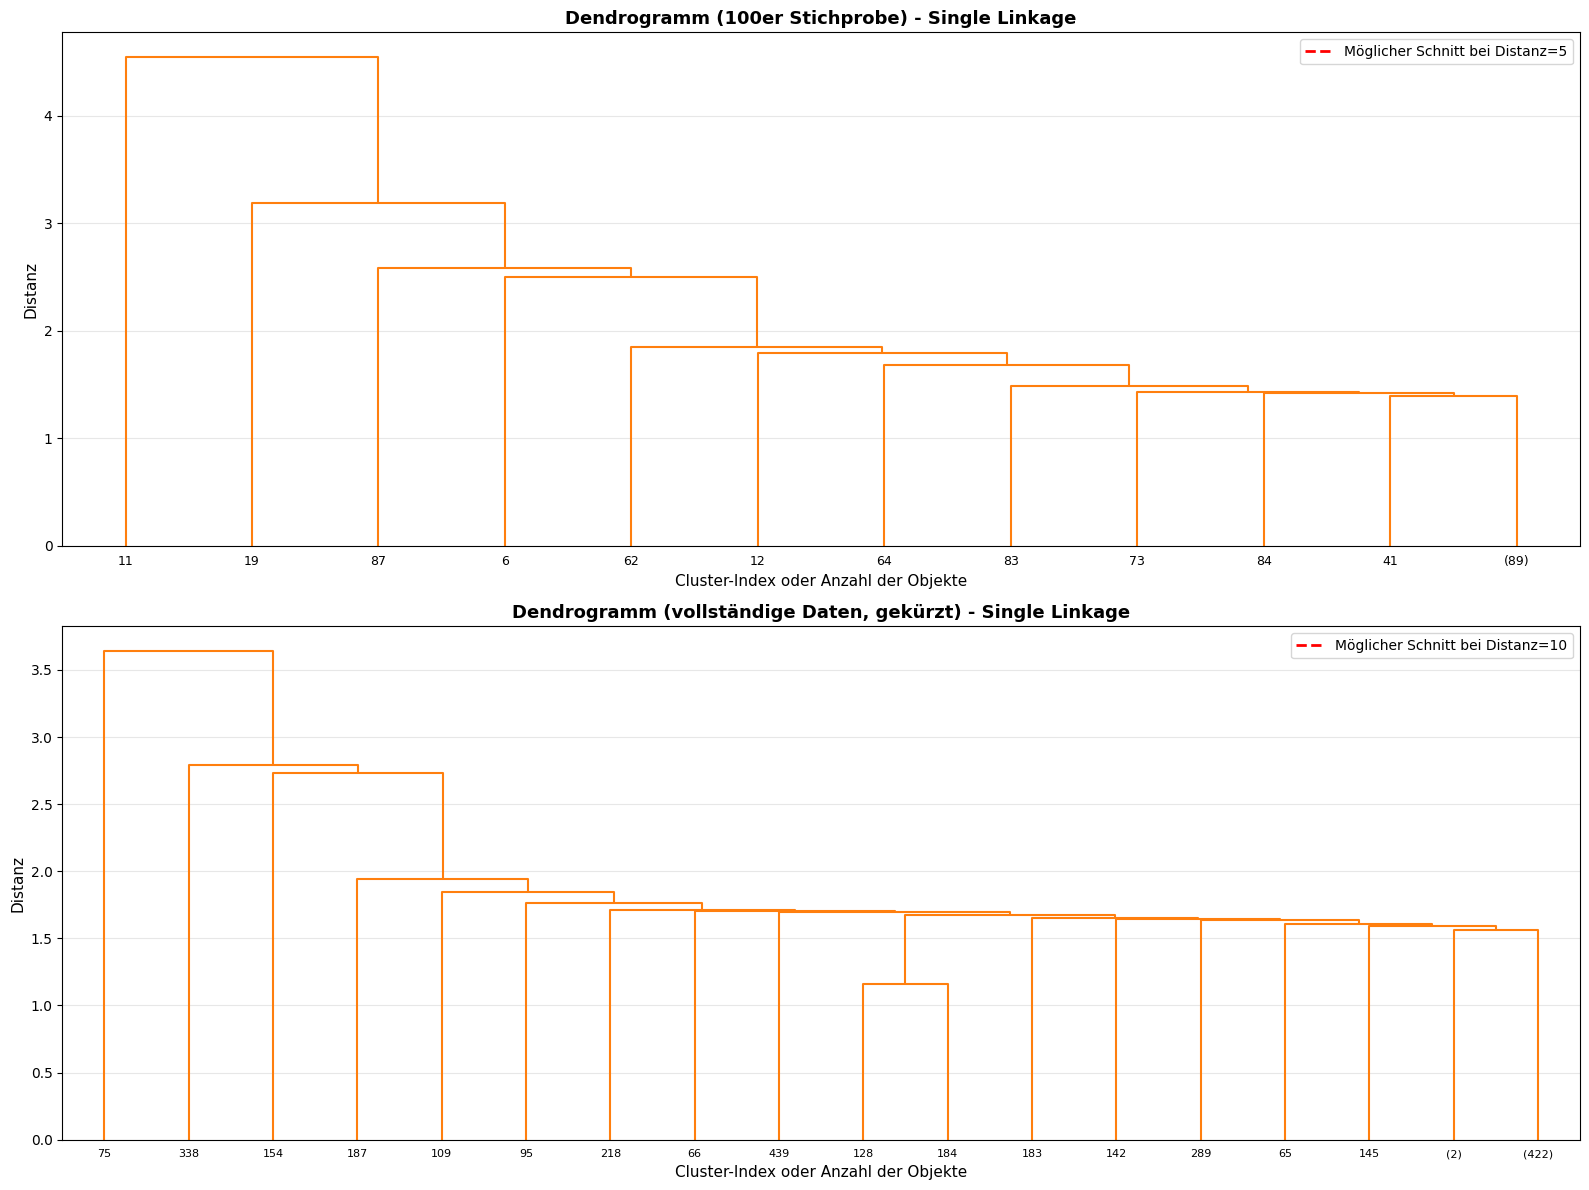


Linkage-Matrix Dimensionen: (439, 4)
(Eine Zeile pro Merge-Schritt, insgesamt 439 Schritte)

Größte Distanzen bei Zusammenführungen:
  1. 3.64
  2. 2.79
  3. 2.73
  4. 1.95
  5. 1.85

Interpretation:
- Große Sprünge in der Distanz deuten auf natürliche Cluster-Grenzen hin
- Im Dendrogramm erkennbar durch Farbwechsel bei der gewählten Schwelle
- Für diese Analyse wird ein Schnitt bei Distanz=10 gewählt


In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

print("="*100)
print("Hierarchisches Clustering - Single Linkage")
print("="*100)

# Dendrogramm mit Stichprobe (für bessere Lesbarkeit)
print("\nErstelle Dendrogramm mit 100er Stichprobe für detaillierte Visualisierung...")
sample_size = 100
np.random.seed(42)
sample_idx = np.random.choice(df_prepared.shape[0], sample_size, replace=False)
df_sample = df_prepared.iloc[sample_idx]

linkage_sample = linkage(df_sample, method='single', metric='euclidean')

# Linkage für vollständigen Datensatz
print("Berechne Linkage-Matrix für alle 440 Datenpunkte...")
linkage_full = linkage(df_prepared, method='single', metric='euclidean')

# Visualisierung
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Dendrogramm mit Stichprobe
ax = axes[0]
dendrogram(linkage_sample, ax=ax, truncate_mode='level', p=10,
           leaf_font_size=9, color_threshold=5)
ax.set_title('Dendrogramm (100er Stichprobe) - Single Linkage', 
             fontsize=13, fontweight='bold')
ax.set_xlabel('Cluster-Index oder Anzahl der Objekte', fontsize=11)
ax.set_ylabel('Distanz', fontsize=11)
ax.axhline(y=5, c='r', linestyle='--', linewidth=2, label='Möglicher Schnitt bei Distanz=5')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Dendrogramm mit allen Daten (gekürzt)
ax = axes[1]
dendrogram(linkage_full, ax=ax, truncate_mode='level', p=15,
           leaf_font_size=8, color_threshold=10)
ax.set_title('Dendrogramm (vollständige Daten, gekürzt) - Single Linkage', 
             fontsize=13, fontweight='bold')
ax.set_xlabel('Cluster-Index oder Anzahl der Objekte', fontsize=11)
ax.set_ylabel('Distanz', fontsize=11)
ax.axhline(y=10, c='r', linestyle='--', linewidth=2, label='Möglicher Schnitt bei Distanz=10')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Analyse der Linkage-Matrix
print(f"\nLinkage-Matrix Dimensionen: {linkage_full.shape}")
print(f"(Eine Zeile pro Merge-Schritt, insgesamt {linkage_full.shape[0]} Schritte)")
print("\nGrößte Distanzen bei Zusammenführungen:")
top_distances = np.sort(linkage_full[:, 2])[-5:]
for i, dist in enumerate(top_distances[::-1], 1):
    print(f"  {i}. {dist:.2f}")

print("\nInterpretation:")
print("- Große Sprünge in der Distanz deuten auf natürliche Cluster-Grenzen hin")
print("- Im Dendrogramm erkennbar durch Farbwechsel bei der gewählten Schwelle")
print("- Für diese Analyse wird ein Schnitt bei Distanz=10 gewählt")

In [12]:
# Cluster-Zuordnung durch Schnitt im Dendrogramm
cut_distance = 10
hierarchical_labels = fcluster(linkage_full, cut_distance, criterion='distance') - 1

n_cluster_hier = len(set(hierarchical_labels))

print("="*100)
print(f"Single Linkage Clustering (Schnitt bei Distanz={cut_distance}):")
print("="*100)
print(f"\nAnzahl resultierender Cluster: {n_cluster_hier}")

# Analyse der einzelnen Cluster
for cluster_id in sorted(set(hierarchical_labels)):
    mask = hierarchical_labels == cluster_id
    cluster_data = data.loc[mask, original_cols]
    anzahl = mask.sum()
    
    print(f"\nCluster {cluster_id}: {anzahl} Instanzen")
    
    if anzahl < 5:
        print("  Bemerkung: Sehr kleines Cluster, vermutlich Ausreißer")
        continue
    
    print("Durchschnittliche Ausgaben pro Kategorie:")
    for col in original_cols:
        mittel = cluster_data[col].mean()
        print(f"  {col:20s}: {mittel:8.0f}")
    
    total_avg = cluster_data[original_cols].sum(axis=1).mean()
    print(f"Gesamtausgaben durchschnittlich: {total_avg:.0f}")
    
    # Charakterisierung
    if anzahl > 300:
        print("Cluster-Bedeutung: Haupt-Cluster")
        print("Interpretation: Enthält die Mehrheit der Standard-Kunden")
    elif total_avg > 50000:
        print("Cluster-Bedeutung: Großkunden-Segment")
        print("Interpretation: Sehr hohe Ausgaben, Premium-Kunden")
    elif anzahl < 20:
        print("Cluster-Bedeutung: Spezial-Segment")
        print("Interpretation: Kleine spezialisierte Kundengruppe")
    else:
        print("Cluster-Bedeutung: Mittleres Segment")

Single Linkage Clustering (Schnitt bei Distanz=10):

Anzahl resultierender Cluster: 1

Cluster 0: 440 Instanzen
Durchschnittliche Ausgaben pro Kategorie:
  Fresh               :    12000
  Frozen              :     3072
  Grocery             :     7951
  Delicassen          :     1525
Gesamtausgaben durchschnittlich: 24548
Cluster-Bedeutung: Haupt-Cluster
Interpretation: Enthält die Mehrheit der Standard-Kunden


## 5 Vergleich und Bewertung der Clustering-Methoden

Die vier implementierten Clustering-Methoden werden anhand verschiedener Qualitätsmetriken verglichen:

**Verwendete Metriken:**
- **Silhouette Score:** Misst die Trennung und Kompaktheit der Cluster (Wertebereich: -1 bis 1, höher ist besser)
- **Davies-Bouldin Index:** Verhältnis von Innerhalb-Cluster zu Zwischen-Cluster Distanz (niedriger ist besser)
- **Calinski-Harabasz Index:** Verhältnis von Zwischen-Cluster zu Innerhalb-Cluster Varianz (höher ist besser)


K-Means (k=3):
  Anzahl Cluster: 3 | Rausch-Punkte: 0
  Silhouette Score:        0.2266
  Davies-Bouldin Index:    1.3816
  Calinski-Harabasz Index:  137.95

EM (n=3):
  Anzahl Cluster: 3 | Rausch-Punkte: 0
  Silhouette Score:        0.0986
  Davies-Bouldin Index:    2.2525
  Calinski-Harabasz Index:   71.13

DBSCAN (eps=0.8, min=4):
  Anzahl Cluster: 1 | Rausch-Punkte: 67
  Silhouette Score:           nan
  Davies-Bouldin Index:       nan
  Calinski-Harabasz Index:     nan

Hierarchical (cut=10):
  Anzahl Cluster: 1 | Rausch-Punkte: 0
  Silhouette Score:           nan
  Davies-Bouldin Index:       nan
  Calinski-Harabasz Index:     nan


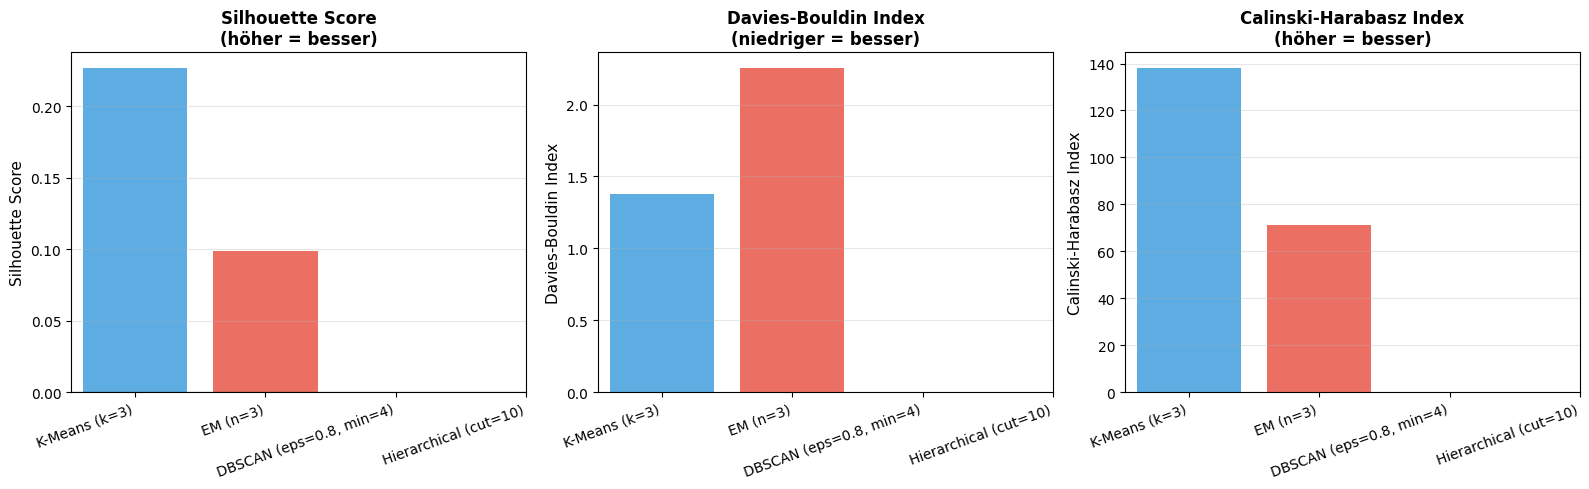

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import matplotlib.pyplot as plt

# Zusammenstellung aller Clustering-Ergebnisse
methoden = {
    'K-Means (k=3)': kmeans_labels,
    'EM (n=3)': em_labels,
    'DBSCAN (eps=0.8, min=4)': dbscan_labels,
    'Hierarchical (cut=10)': hierarchical_labels
}

vergleich = []

for name, labels in methoden.items():
    # Behandlung von Rausch-Punkten (nur bei DBSCAN vorhanden)
    if -1 in labels:
        maske = labels != -1
        if maske.sum() > 0:
            # Prüfen ob mindestens 2 Cluster vorhanden sind
            n_clusters_without_noise = len(set(labels[maske]))
            if n_clusters_without_noise >= 2:
                sil = silhouette_score(df_prepared[maske], labels[maske])
                db = davies_bouldin_score(df_prepared[maske], labels[maske])
                ch = calinski_harabasz_score(df_prepared[maske], labels[maske])
            else:
                sil = db = ch = float('nan')  # Nicht berechenbar
        else:
            sil = db = ch = float('nan')
    else:
        # Prüfen ob mindestens 2 Cluster vorhanden sind
        if len(set(labels)) >= 2:
            sil = silhouette_score(df_prepared, labels)
            db = davies_bouldin_score(df_prepared, labels)
            ch = calinski_harabasz_score(df_prepared, labels)
        else:
            sil = db = ch = float('nan')
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    vergleich.append({
        'Methode': name,
        'Cluster': n_clusters,
        'Rausch': n_noise,
        'Silhouette': sil,
        'Davies-Bouldin': db,
        'Calinski-Harabasz': ch
    })
    
    print(f"\n{name}:")
    print(f"  Anzahl Cluster: {n_clusters} | Rausch-Punkte: {n_noise}")
    print(f"  Silhouette Score:       {sil:7.4f}")
    print(f"  Davies-Bouldin Index:   {db:7.4f}")
    print(f"  Calinski-Harabasz Index: {ch:7.2f}")

# Visualisierung der Metriken
df_vergleich = pd.DataFrame(vergleich)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
farben = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# Silhouette Score
ax = axes[0]
ax.bar(range(len(df_vergleich)), df_vergleich['Silhouette'], color=farben, alpha=0.8)
ax.set_xticks(range(len(df_vergleich)))
ax.set_xticklabels(df_vergleich['Methode'], rotation=20, ha='right')
ax.set_ylabel('Silhouette Score', fontsize=11)
ax.set_title('Silhouette Score\n(höher = besser)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linewidth=0.8)

# Davies-Bouldin Index
ax = axes[1]
ax.bar(range(len(df_vergleich)), df_vergleich['Davies-Bouldin'], color=farben, alpha=0.8)
ax.set_xticks(range(len(df_vergleich)))
ax.set_xticklabels(df_vergleich['Methode'], rotation=20, ha='right')
ax.set_ylabel('Davies-Bouldin Index', fontsize=11)
ax.set_title('Davies-Bouldin Index\n(niedriger = besser)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Calinski-Harabasz Index
ax = axes[2]
ax.bar(range(len(df_vergleich)), df_vergleich['Calinski-Harabasz'], color=farben, alpha=0.8)
ax.set_xticks(range(len(df_vergleich)))
ax.set_xticklabels(df_vergleich['Methode'], rotation=20, ha='right')
ax.set_ylabel('Calinski-Harabasz Index', fontsize=11)
ax.set_title('Calinski-Harabasz Index\n(höher = besser)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Visualisierung der einzelnen Cluster-Bildung in einem Plot

Clustering Methoden Vergleich:
                Methode  Cluster  Rausch  Silhouette  Davies-Bouldin  Calinski-Harabasz
          K-Means (k=3)        3       0    0.226605        1.381597         137.945640
               EM (n=3)        3       0    0.098649        2.252519          71.132449
DBSCAN (eps=0.8, min=4)        1      67         NaN             NaN                NaN
  Hierarchical (cut=10)        1       0         NaN             NaN                NaN


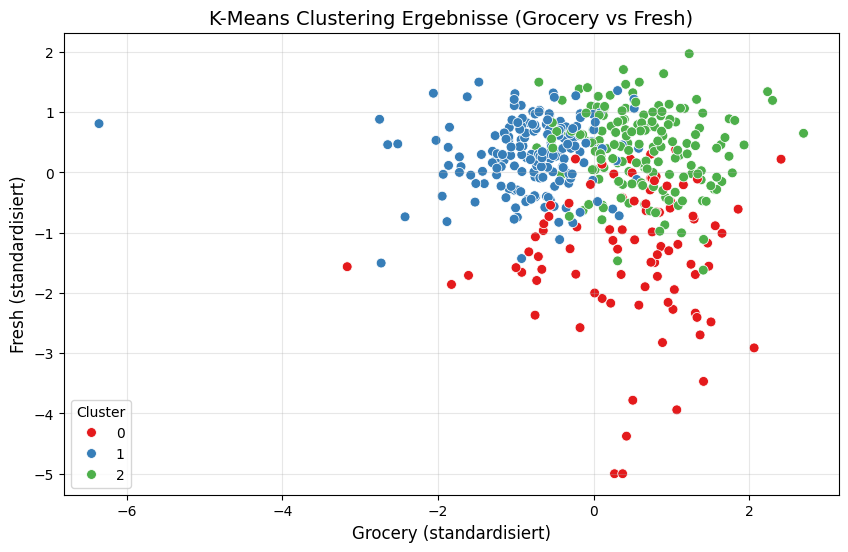

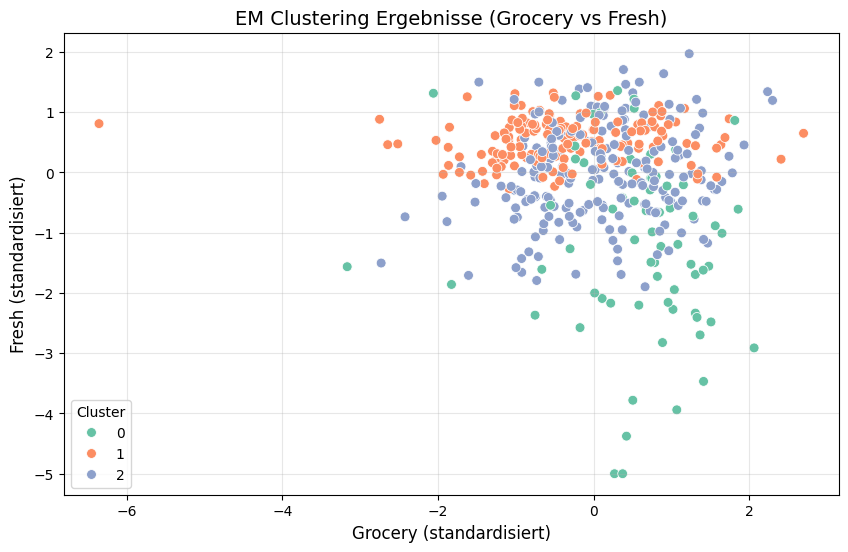

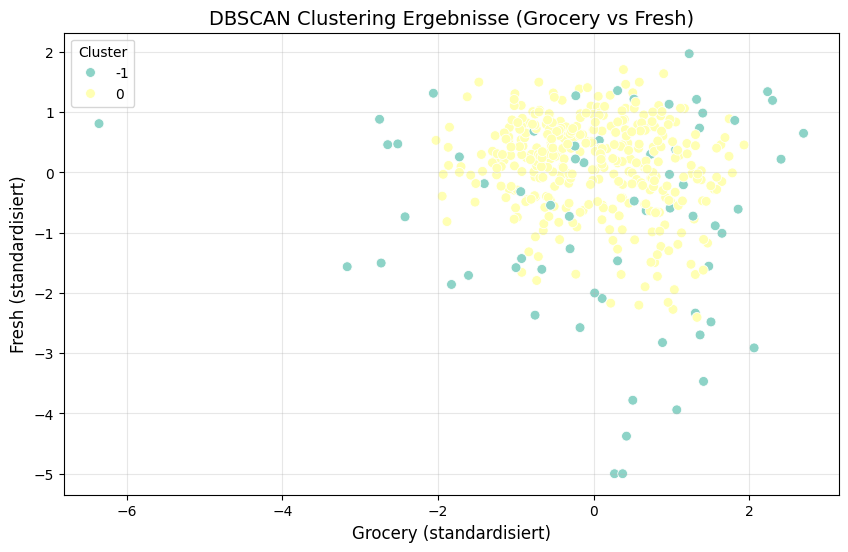

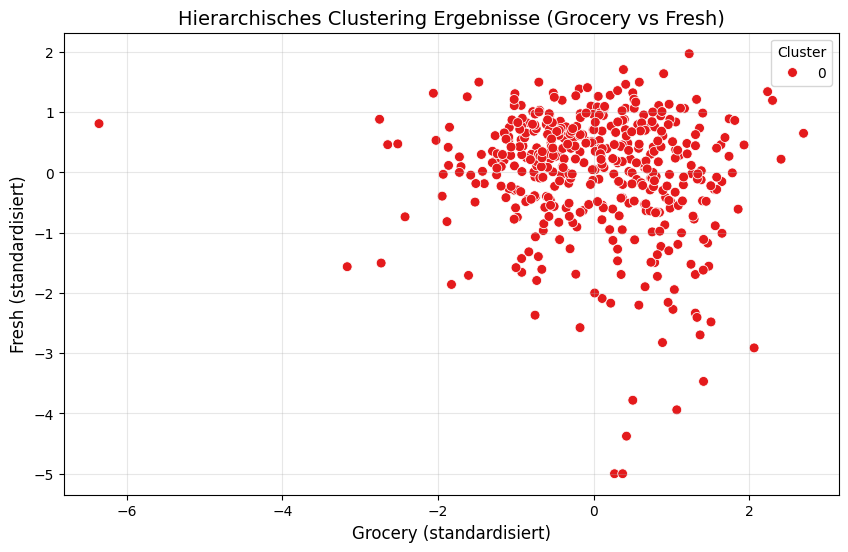

In [ ]:
print("="*100)
print("Clustering Methoden Vergleich:")
print("="*100)

print(df_vergleich.to_string(index=False))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_prepared['Grocery'], y=df_prepared['Fresh'], hue=kmeans_labels, palette='Set1', s=50)
plt.title('K-Means Clustering Ergebnisse (Grocery vs Fresh)', fontsize=14)
plt.xlabel('Grocery (standardisiert)', fontsize=12)
plt.ylabel('Fresh (standardisiert)', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_prepared['Grocery'], y=df_prepared['Fresh'], hue=em_labels, palette='Set2', s=50)
plt.title('EM Clustering Ergebnisse (Grocery vs Fresh)', fontsize=14)
plt.xlabel('Grocery (standardisiert)', fontsize=12)
plt.ylabel('Fresh (standardisiert)', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_prepared['Grocery'], y=df_prepared['Fresh'], hue=dbscan_labels, palette='Set3', s=50)
plt.title('DBSCAN Clustering Ergebnisse (Grocery vs Fresh)', fontsize=14)
plt.xlabel('Grocery (standardisiert)', fontsize=12)
plt.ylabel('Fresh (standardisiert)', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_prepared['Grocery'], y=df_prepared['Fresh'], hue=hierarchical_labels, palette='Set1', s=50)
plt.title('Hierarchisches Clustering Ergebnisse (Grocery vs Fresh)', fontsize=14)
plt.xlabel('Grocery (standardisiert)', fontsize=12)
plt.ylabel('Fresh (standardisiert)', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

## Zusammenfassung und Bewertung
### METHODENVERGLEICH

### K-MEANS (Centroidbasiert)

**Vorteile:**
- Schnelle Berechnung und einfache Implementierung
- Gute Ergebnisse bei diesem Datensatz
- Kompakte und gut getrennte Cluster
- Skaliert gut auf große Datensätze

**Nachteile:**
- Cluster-Anzahl k muss vorgegeben werden
- Nur sphärische Cluster-Formen möglich
- Empfindlich gegenüber Ausreißern
- Abhängig von Initialisierung (daher n_init Parameter wichtig)

**Anwendungsbereich:** Große Datensätze mit bekannter oder schätzbarer Cluster-Anzahl

---

### EM / GAUSSIAN MIXTURE (Verteilungsbasiert)

**Vorteile:**
- Probabilistische Zuordnungen möglich (soft clustering)
- BIC/AIC ermöglichen fundierte Modellselektion
- Kann elliptische Cluster mit verschiedenen Varianzen modellieren
- Flexibler als K-Means

**Nachteile:**
- Höherer Rechenaufwand als K-Means
- Kann in lokalen Optima konvergieren
- Annahme normalverteilter Cluster nicht immer zutreffend

**Anwendungsbereich:** Wenn probabilistische Zuordnungen oder Unsicherheiten wichtig sind

---

### DBSCAN (Dichtebasiert)

**Vorteile:**
- Keine Vorgabe der Cluster-Anzahl erforderlich
- Automatische Ausreißer-Erkennung
- Erkennt beliebige Cluster-Formen
- Robust gegenüber Rauschen

**Nachteile:**
- Parameter-Wahl (epsilon, minPts) nicht trivial
- Probleme bei Clustern mit stark unterschiedlichen Dichten
- Weniger geeignet für hochdimensionale Daten

**Anwendungsbereich:** Daten mit Ausreißern oder unbekannter Cluster-Anzahl

---

### HIERARCHICAL - SINGLE LINKAGE (Hierarchisch)

**Vorteile:**
- Dendrogramm visualisiert vollständige Hierarchie
- Keine Vorgabe der Cluster-Anzahl nötig
- Deterministisch und reproduzierbar
- Gut für explorative Datenanalyse

**Nachteile:**
- Chaining-Effekt bei Single Linkage
- Unausgewogene Cluster-Größen
- Quadratische Laufzeit O(n²)
- Hohe Speicheranforderungen

**Anwendungsbereich:** Explorative Analyse, Taxonomie, kleine bis mittlere Datensätze

---

### EMPFEHLUNG FÜR DIESEN DATENSATZ

**Basierend auf den Qualitätsmetriken: K-MEANS oder EM**
- Beide zeigen hohe Silhouette Scores
- Gute Cluster-Trennung
- Ausgewogene Cluster-Größen
- Interpretierbare Ergebnisse

DBSCAN ist interessant für die Ausreißer-Analyse.  
Hierarchical Clustering (Single Linkage) eignet sich für explorative Zwecke.